**Chapter 3 – Classification**

_This notebook contains all the sample code and solutions to the exercises in chapter 3._

In previous lesson we predicted values, now we will be predicting classes. 

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
#PROJECT_ROOT_DIR = "."
#CHAPTER_ID = "classification"
#IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
#os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = fig_id + "." + fig_extension
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
print(1)

1


# MNIST

We will use data on handwriting of 70,000 digits written by school children and Census employees trying to correctly classify the digits.

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Scikit-learn data have a dictionary (DESCR), "data" for features and "target" for labels

In [4]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
28*28

784

Each images has 28 by 28 pixels, with each pixed containing information on color intensity from 0 (white) to 255 (black). Let's plot it.

Saving figure some_digit_plot


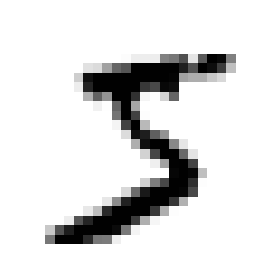

In [7]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [8]:
# As you might have guessed the correct number is:
y[0]

'5'

In [9]:
y = y.astype(np.uint8)
# Create a function to draw the picture above.
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [10]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Saving figure more_digits_plot


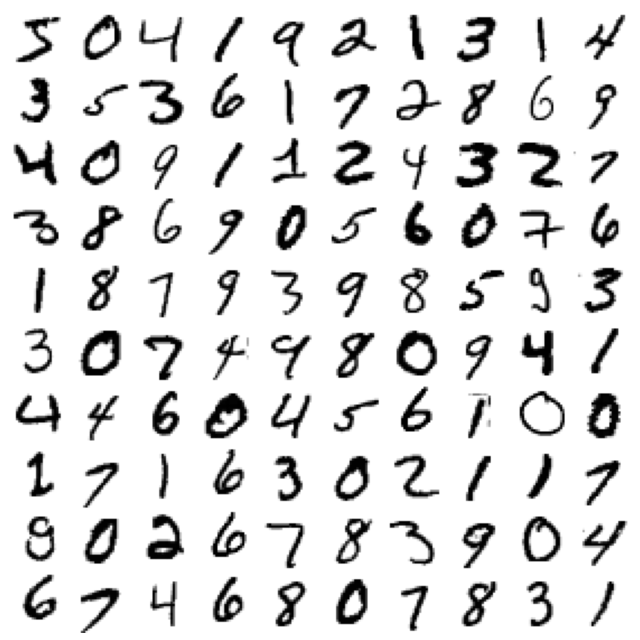

In [11]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [12]:
# We randomly assign 60000 obs to training data and the rest to the testing data
import numpy as np
np.random.seed(123)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Binary classifier

Let's start with a simple task to classify one digit (5). The classifier is true for all 5s, False for all other digits.

In [13]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

Let's start with a Stochastic Gradient Descent (SGD) classifier, using Scikit-Learn’s SGDClassifier class. This classifier
has the advantage of being capable of handling very large datasets efficiently.
This is in part because SGD deals with training instances independently, one at a time
(which also makes SGD well suited for online learning), as we will see later. Let’s create
an SGDClassifier and train it on the whole training set:

In [14]:
# The alhorithm relies on randomness and for reproducibility requires random_state parameter.
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=20, random_state=42)
sgd_clf.fit(X_train, y_train_5)

/Users/ir177/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(max_iter=20, random_state=42)

In [15]:
# Test for our digit.
sgd_clf.predict([some_digit])

array([ True])

## Confusion Matrix
$\begin{array}{rrr} \hline
  & \text{Predict No} & \text{Predict Yes} \\ \hline
 \text{Actual No} & \text{True Negatives} & \text{False Positives} \\  
 \text{Actual Yes} & \text{False Negatives} & \text{True Positives} \\  \hline
\end{array}$


In [16]:
# Let's start with accuracy
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

/Users/ir177/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/ir177/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/ir177/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([0.9678 , 0.96225, 0.9613 ])

Sometimes you want to make create stratified sample for cross-validation to ensure that each random draw has balanced classes. We want to avoid situation where in one there will no number '2', for example.

In [17]:
# New Material 
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

/Users/ir177/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/ir177/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.9678


/Users/ir177/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.96225
0.9613


/Users/ir177/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In our case it made no difference.

Wow! Above 95% accuracy (ratio of correct predictions) on all cross-validation folds?
This looks amazing, doesn’t it? Well, before you get too excited, let’s look at a very
dumb classifier that just classifies every single image in the “not-5” class:

In [18]:
# Let's look at a simple binary classifier: correctly classify 5 vs. not-5 digits.
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    # We don't really fit anything
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        # We return a vector of zeros effectively predicting that all digits are not-5
        return np.zeros((len(X), 1), dtype=bool)

In [19]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91   , 0.90845, 0.9105 ])

Now 95% accuracy does not look that impressive. This is simply because only about 10% of the
images are 5s, so if you always guess that an image is not a 5, you will be right about
90% of the time.
This demonstrates why accuracy is generally not the preferred performance measure
for classifiers, especially when you are dealing with skewed datasets (i.e., when some
classes are much more frequent than others).

Cross_val_predict predicts evaluation score for each fold. The model estimated in each prediction is based on a different fold.

In [20]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

/Users/ir177/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/ir177/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/ir177/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [21]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53810,   769],
       [ 1404,  4017]])

$\begin{array}{rrr} \hline
  & \text{Predict No} & \text{Predict Yes} \\ \hline
 \text{Actual No} & \text{True Negatives} & \text{False Positives} \\  
 \text{Actual Yes} & \text{False Negatives} & \text{True Positives} \\  \hline
\end{array}$

We have 10 times as many false positive as false negatives. This is because our signal (5) is rare relative to the noise (not-5), so we are much more likely to get false positives. 

In [22]:
y_train_perfect_predictions = y_train_5

In [23]:
# Example of perfect prediction. We made a table from two identical vectors. No errors!
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

An interesting one to look at is the accuracy of the positive predictions this is called the precision of the classifier. 

TP is the number of true positives, and FP is the number of false positives.
A trivial way to have perfect precision is to make one single positive prediction and
ensure it is correct (precision = 1/1 = 100\%). This would not be very useful since the
classifier would ignore all but one positive instance. So precision is typically used
along with another metric named recall, also called sensitivity or true positive rate
(TPR): this is the ratio of positive instances that are correctly detected by the classifier

FN is of course the number of false negatives.
Precision is the share of correctly identified positive values.  <br>
$Precision = \frac{TP}{TP + FP}$ <br>
Recall is the fraction of the true positive values identified.  <br>
$Recall = \frac{TP}{TP + FN}$  <br>
Accuracy is the total error rate. It works if the positive and negative value are roughly balanced.  <br>
$Accuracy = \frac{TP + TN}{P + N}$  <br>

In [24]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) 

0.8393230254910155

In [25]:
# Remember precision is TP / (TP + FP)
4344 / (4344 + 1307)

0.7687135020350381

In [26]:
recall_score(y_train_5, y_train_pred)

0.7410071942446043

In [27]:
4344 / (4344 + 1077)

0.801328168234643

Now your 5-detector does not look as shiny as it did when you looked at its accuracy. When it claims an image represents a 5, it is correct only 77% of the time. Moreover,
it only detects 79% of the 5s.

It is often convenient to combine precision and recall into a single metric called the F1
score, in particular if you need a simple way to compare two classifiers. The F1 score is
the harmonic mean of precision and recall (Equation 3-3). Whereas the regular mean
treats all values equally, the harmonic mean gives much more weight to low values.
As a result, the classifier will only get a high F1 score if both recall and precision are
high. <br> <br>
$F1 = \frac{2}{\frac{1}{Precision} + \frac{1}{Recall}} =
2 * \frac{Precision * Recall}{Precision + Recall} = \frac{TP}{TP + \frac{FN + FP}{2}}$

In [28]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)
# F1 is a good choice for data where the share of positives is greatly different from 0.5

0.7871068874301949

In [29]:
# Check the formula
4344 / (4344 + (1077 + 1307)/2)

0.7846820809248555

The F1 score favors classifiers that have similar precision and recall. <br>
This is not always what you want: in some contexts you mostly care about precision, and in other contexts you really care about recall.<br>


For example, if you trained a classifier to detect videos that are safe for kids, you would probably prefer a classifier that rejects many good videos (low recall) but keeps only safe ones (high precision), rather than a classifier
that has a much higher recall but lets a few really bad videos show up in your
product. <br>
On the other hand, suppose you train a classifier to detect shoplifters on surveillance images: it is probably fine if your classifier has only 30% precision as long as it has 99% recall (sure, the security guards will get a few false alerts, but almost all shoplifters will get caught). <br>

Unfortunately, you can’t have it both ways: increasing precision reduces recall, and
vice versa. This is called the precision/recall tradeoff. <br>

Imagine your algorithm produces a score how much each digit resembles digit 5. Let's the algorithm decide that it is optimal to label all digits with a score greater than 0.8 as digit 5. If we artificially increase the benchmark to 0.9, we will increase our precision (almost all digits we classify as fives would be actually fives), but we would reduce recall (we would catch fewer fives in the data).  Lowering the benchmark to 0.5 would produce an opposite effect. 

Decision function of the SGD algorithm produces a similarity score used in the classification. By default if the score it greater than 0 the observation is classified as positive.

In [30]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores
# In this case the score is greteer than 0, so the digit is classified as 5.

array([43897.12266081])

In [31]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [32]:
y_some_digit_pred

array([ True])

In [33]:
# If we increase a threshhold greater than 161855..
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [34]:
# Get the secision scores
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

/Users/ir177/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/ir177/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/ir177/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [35]:
# Vector of decision score for the whole training datasets
y_scores.shape

(60000,)

In [36]:
# hack to work around issue #9589 in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

Next we will calculate recall and precision scores.

In [37]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

The algorithm picked a threshold that maximizes both prevision and recall. Lowering the threshold increases recall and decreases precision. Increasing the threshold leads to the opposite effect.

Saving figure precision_recall_vs_threshold_plot


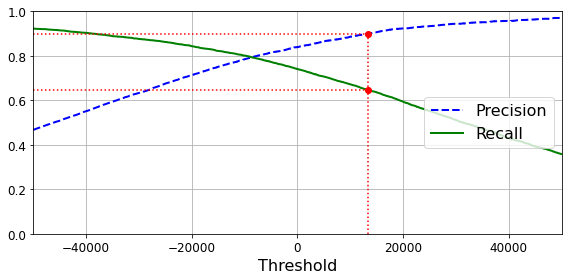

In [38]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

Precision is more bumpy. Generally there is an inverse relationship between precision and recall. However, there are exceptions. Consider the following:     2 2 3 4 5 2 4 5 | 4  5 5 5. Current precision is 3/4 = 0.75, recall 3/5 = 0.6. If we move the threshold to 2 2 3 4 5 2 4 | 5 4 5 5 5 we caught one more five, it increases both precision 4/5 = 0.8 and recall 4/5 = 0.8. This behavior is more likely in the right tail of threshold distribution when we are likely to catch 5 if we move the threshold to the right.  

In [39]:
(y_train_pred == (y_scores > 0)).all()

True

In [40]:
# If you aim for a 90% precision:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
print(threshold_90_precision)
y_train_pred_90 = (y_scores > threshold_90_precision)

13302.772840588796


In [41]:
precision_score(y_train_5, y_train_pred_90)

0.9000513874614594

In [42]:
recall_score(y_train_5, y_train_pred_90)

0.6461907397159196

Saving figure precision_vs_recall_plot


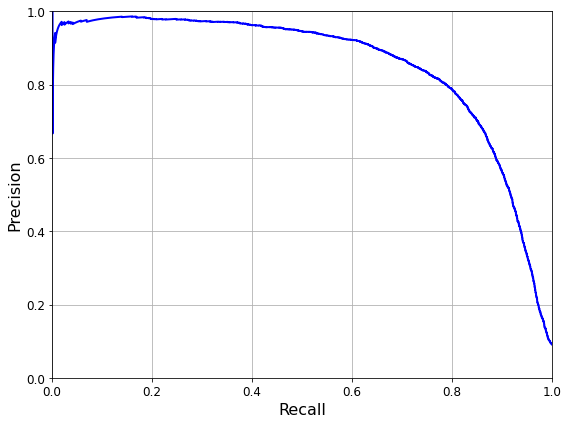

In [43]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
save_fig("precision_vs_recall_plot")
plt.show()

# ROC curves

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. It plots the true positive rate (another name for recall) against the false positive rate. <br>
$TPR = \frac{TP}{TP + FN}$ <br>
$FPR = \frac{FP}{FP + TN}$

In [44]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Saving figure roc_curve_plot


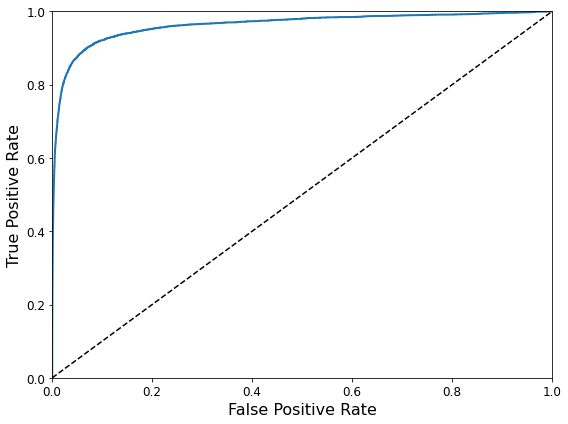

In [45]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
save_fig("roc_curve_plot")
plt.show()

Tradeoff: the higher the recall (TPR), the more false positives (FPR) the classifier produces. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward
the top-left corner). <br> <br>

One way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. Scikit-Learn provides a function to compute the ROC
AUC. Hi AUC works for many different TPR-FPR choice. <br> <br>

Use PR curve when the positive class is rare and you care more about false positives than about false negatives. Use ROC, AUC otherwise. 

In [46]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9631250776959834

Let’s train a RandomForestClassifier and compare its ROC curve and ROC AUC
score to the SGDClassifier. <br>

We calculate score for each instance in the training data. RandomForestClassifier class does not have a decision_function(),  instead it has predict_proba(). Each instance is assigned a probability of belonging to each class.

In [47]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [48]:
from scipy import stats
stats.describe(y_probas_forest)

DescribeResult(nobs=60000, minmax=(array([0., 0.]), array([1., 1.])), mean=array([0.9087515, 0.0912485]), variance=array([0.05188081, 0.05188081]), skewness=array([-2.97398968,  2.97398968]), kurtosis=array([7.49824756, 7.49824756]))

In [49]:
y_scores_forest = y_probas_forest[:, 1] # score = probability of positive class
# Get fit data from the random forest
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

Saving figure roc_curve_comparison_plot


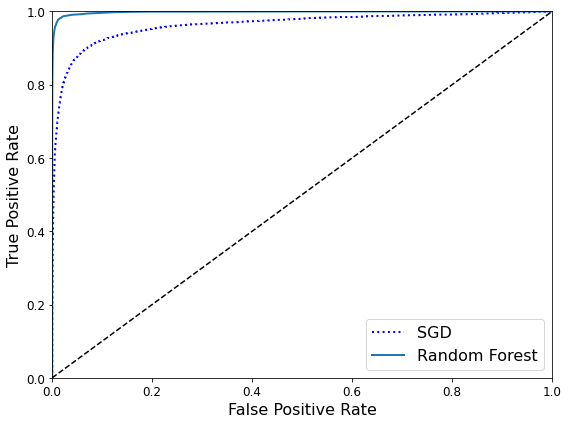

In [50]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

Random forest has very good fit statistics

In [51]:
roc_auc_score(y_train_5, y_scores_forest)

0.9982409026036764

In [52]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9887005649717514

In [53]:
recall_score(y_train_5, y_train_pred_forest)

0.8716104039845047

98.5% precision and 82.2% recall

# Multiclass classification

Whereas binary classifiers distinguish between two classes, multiclass classifiers can distinguish between more than two classes.Some algorithms (such as Random Forest classifiers or naive Bayes classifiers) are capable of handling multiple classes directly. Others (such as Support Vector Machine classifiers or Linear classifiers) are strictly binary classifiers. <br> 

You can use binary classifiers to estimate multiclass classification: <br>
1 Create 10 binary classifier for each digit versus the rest of the digits, similar to our five or not-five classifiers. After we estimate 10 classifiers for each digit we set a label for the classifier that produced the highest score. This is called the one-versus-all (OvA) strategy (also called one-versus-the-rest). <br>

2 Another strategy is o train binary classifier for each paid of digits: 0s vs 1s, 0 vs 4s, etc. This is called the one-versus-one (OvO) strategy. If there are N classes, you need to train N × (N – 1) / 2 classifiers. For the MNIST problem, this means training 45 binary classifiers! For each digit we pick the label with the highest average score against 9 other digits. The main advantage of OvO is that each classifier only needs to be trained on the part of the training set for the two classes that it must distinguish. <br>

Algorithms that scales poorly (like SVM) are preferable for OVO, which reduce the data used in the estimation. However, most often  OvA is preferred and it is a usually the default option for binary classifiers other than SVM.


In [54]:
# Let's try SGD algorithm.
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

/Users/ir177/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([5], dtype=uint8)

In [55]:
# Let's look at the 10 estimated scores for the digit. 5 has the higher score  161855.74572176.
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-126680.62128522, -144760.17377976, -110839.43694033,
         -55084.9346606 , -196508.90122342,   19891.15814642,
        -147812.82737525, -113354.53138958, -139579.91503679,
        -178702.59870163]])

In [56]:
# Which vector has the highest score
np.argmax(some_digit_scores)

5

In [57]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [58]:
sgd_clf.classes_[5]

5

In [59]:
# Here is the example of the OVO classifier.
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

/Users/ir177/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/ir177/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/ir177/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/ir177/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning:

array([5], dtype=uint8)

In [60]:
# As expected we estimated 45 binary classfiers
len(ovo_clf.estimators_)

45

In [61]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])
# Prediction is still 5

array([5], dtype=uint8)

In [62]:
forest_clf.predict_proba([some_digit])
# This classifier returns probabilities. The probability of digit 5 is 80%, 10% that it is 0 and 10% that it is 3.

array([[0.  , 0.  , 0.01, 0.07, 0.  , 0.91, 0.  , 0.  , 0.01, 0.  ]])

In [63]:
# Perfomance of OVA SGD.
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")
# Accuracy of three folds

/Users/ir177/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/ir177/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/ir177/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([0.88015, 0.8627 , 0.83595])

In [64]:
# Usually scaling the data improves the accracy
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")


/Users/ir177/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/ir177/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/ir177/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([0.91115, 0.91255, 0.9095 ])

# Error Analysis #

Real life project has multiple steps such as exploring data preparation options, trying out multiple models, shortlisting the best ones and fine-tuning their hyperparameters using GridSearchCV, and automating as much as possible.

Here, we will assume that you have found a promising model and you want to find ways to improve it. One way to do this is to analyze the types of errors it makes.

In [65]:
# Let's look at the confusion matrix
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

/Users/ir177/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/ir177/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/ir177/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([[5720,    2,   24,   10,   11,   58,   41,    7,   46,    4],
       [   1, 6485,   41,   30,    5,   42,    7,    8,  108,   15],
       [  43,   34, 5347,  106,   75,   23,  100,   54,  162,   14],
       [  37,   34,  134, 5372,    1,  233,   33,   49,  137,  101],
       [  16,   26,   42,   10, 5332,   11,   65,   35,   89,  216],
       [  58,   34,   32,  190,   62, 4629,  101,   25,  184,  106],
       [  30,   24,   45,    2,   36,   93, 5631,    8,   48,    1],
       [  17,   16,   66,   32,   54,   11,    8, 5780,   20,  261],
       [  37,  129,   68,  162,   10,  157,   62,   22, 5052,  152],
       [  34,   30,   28,   84,  148,   33,    2,  187,   87, 5316]])

Digit 5 has the lower correct prediction 4,582, digit 1 has the highest correct prediction 6,493. Let's look at the graphical representation.

In [66]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    # Plot 8 by 8 matrix
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    # Color intensity comes from the matrix.
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Saving figure confusion_matrix_plot


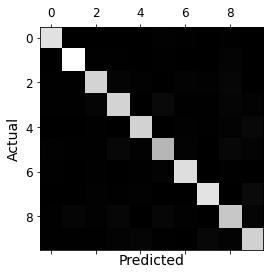

In [67]:
# Digit five is darker, digit 1 is ligher. 
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.xlabel("Predicted")
plt.ylabel("Actual")
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

Off-diagonal elements are the errors. We can look at most common misclassifications. From the matrix, we can see that the most common error is the confusion of digits 7 and 9 (236, 223).

In [68]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

Saving figure confusion_matrix_errors_plot


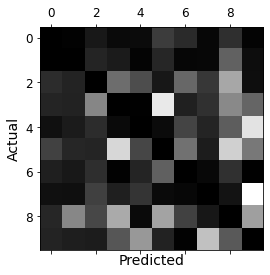

In [69]:
# We will no plot a diagal elements, otherwise their intensity would dominated the chart. 
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.xlabel("Predicted")
plt.ylabel("Actual")
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

Largest error: symmetric confusion of 7/9, and 3/5. Other errors are asymmetric: the classification confuses 6 for 8, but not the 8 for 6. <br> 

Solutions: <br> 
1 gather more training data for the confusing digits <br> 
2 setup closed loops that would run the algorithm until the desired error rate is achieved <br> 
3 Preprocess the data engineering new features <br> 

<br> 
Analyzing individual errors can also be a good way to gain insights on what your classifier is doing and why it is failing, but it is more difficult and time-consuming. Let’s plot examples of 3s and 5s.

Saving figure error_analysis_digits_plot


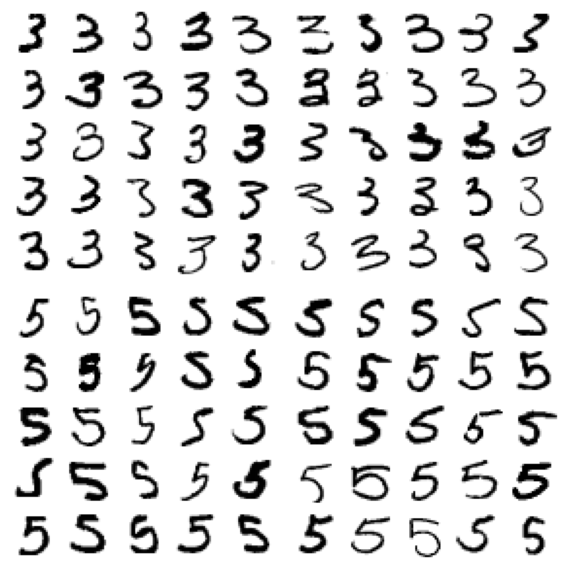

In [70]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()

Top-left are the correcly classified 3s, top-right are 3s misclassified for 5s. Bottom-left are 5s misclassified as 3s, 
bottom-right are the correctly classified 5s.  <br>

Humans can easily recognize most of the errors. SGDClassifier assigns a weight to each pixel intensity, as 3s and 5s are differ 
by only few pixel it's easy to confuse them by shifting and rotation of the small line that makes a difference between 3 and 5. 
Another solution: center and rotate all digits in the same way.

# Multilabel classification

Mutlilabel classification marks each object relative to several classes. For example, if we are looking for three people in 
the picture Alice, Bob, and Charlie, then the classification would return  [1, 0, 1]  if it thinks that Alice and Charlie is in the picture, but not the Bob. Usually restriction on the multiple label help us to estimate this system. For example, if Bob and Charlie look alike we just need to find out two objects that resembles [Bob, Charlie], this is often easier that trying to distinguish similar objects. 

We create two classes of digits large (>6) and odd. We use the KNN (Kth nearest neighbor) , which is a weighted average of classes for the K nearest neighbors. 

In [71]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [72]:
knn_clf.predict([some_digit])

array([[False,  True]])

And it gets it right! The digit 5 is indeed not large (False) and odd (True).

**Warning**: the following cell may take a very long time (possibly hours depending on your hardware). KNN can be a very slow algorithm. F1 can weight classes by importance. 

In [73]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9770898299696815

#Muloutput classification

In [74]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

Saving figure noisy_digit_example_plot


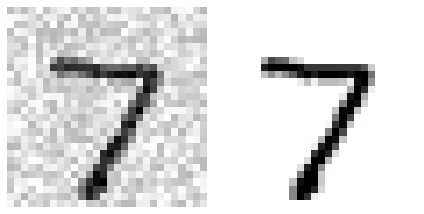

In [75]:
some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
save_fig("noisy_digit_example_plot")
plt.show()

Saving figure cleaned_digit_example_plot


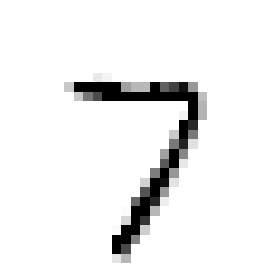

In [76]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)
save_fig("cleaned_digit_example_plot")

# Extra material

## Dummy (ie. random) classifier

In [77]:
from sklearn.dummy import DummyClassifier
dmy_clf = DummyClassifier()
y_probas_dmy = cross_val_predict(dmy_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_scores_dmy = y_probas_dmy[:, 1]

/Users/ir177/opt/anaconda3/lib/python3.8/site-packages/sklearn/dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


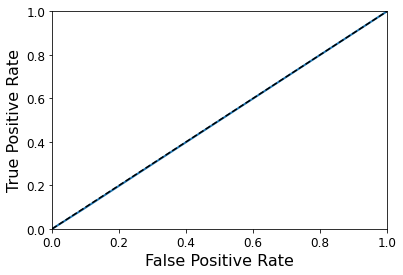

In [78]:
fprr, tprr, thresholdsr = roc_curve(y_train_5, y_scores_dmy)
plot_roc_curve(fprr, tprr)

## KNN classifier

In [79]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=4, weights='distance')

In [ ]:
y_knn_pred = knn_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

In [ ]:
from scipy.ndimage.interpolation import shift
def shift_digit(digit_array, dx, dy, new=0):
    return shift(digit_array.reshape(28, 28), [dy, dx], cval=new).reshape(784)

plot_digit(shift_digit(some_digit, 5, 1, new=100))

In [ ]:
X_train_expanded = [X_train]
y_train_expanded = [y_train]
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    shifted_images = np.apply_along_axis(shift_digit, axis=1, arr=X_train, dx=dx, dy=dy)
    X_train_expanded.append(shifted_images)
    y_train_expanded.append(y_train)

X_train_expanded = np.concatenate(X_train_expanded)
y_train_expanded = np.concatenate(y_train_expanded)
X_train_expanded.shape, y_train_expanded.shape

In [ ]:
knn_clf.fit(X_train_expanded, y_train_expanded)

In [ ]:
y_knn_expanded_pred = knn_clf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_knn_expanded_pred)

In [ ]:
ambiguous_digit = X_test[2589]
knn_clf.predict_proba([ambiguous_digit])

In [ ]:
plot_digit(ambiguous_digit)